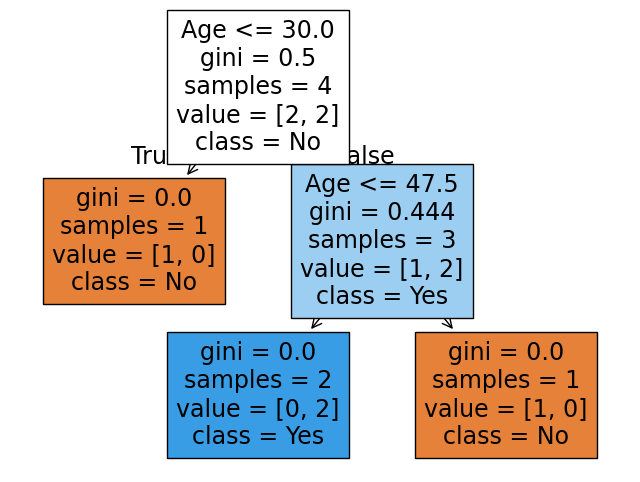

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Sample dataset
X = [[25], [35], [45], [50]]  # Age
y = [0, 1, 1, 0]  # 0 = No, 1 = Yes

# Create Decision Tree model
model = DecisionTreeClassifier(criterion="gini", max_depth=2)
model.fit(X, y)

# Plot the tree
plt.figure(figsize=(8,6))
tree.plot_tree(model, feature_names=["Age"], class_names=["No", "Yes"], filled=True)
plt.show()


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("social.csv")
del dataset['Gender']
dataset.head(5)

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19.0,19000.0,0
1,15810944,35.0,20000.0,0
2,15668575,26.0,43000.0,0
3,15603246,27.0,57000.0,0
4,15804002,19.0,76000.0,0


In [4]:
dataset.isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
dt.score(x_test,y_test)*100

86.25

In [12]:
from sklearn.tree import plot_tree

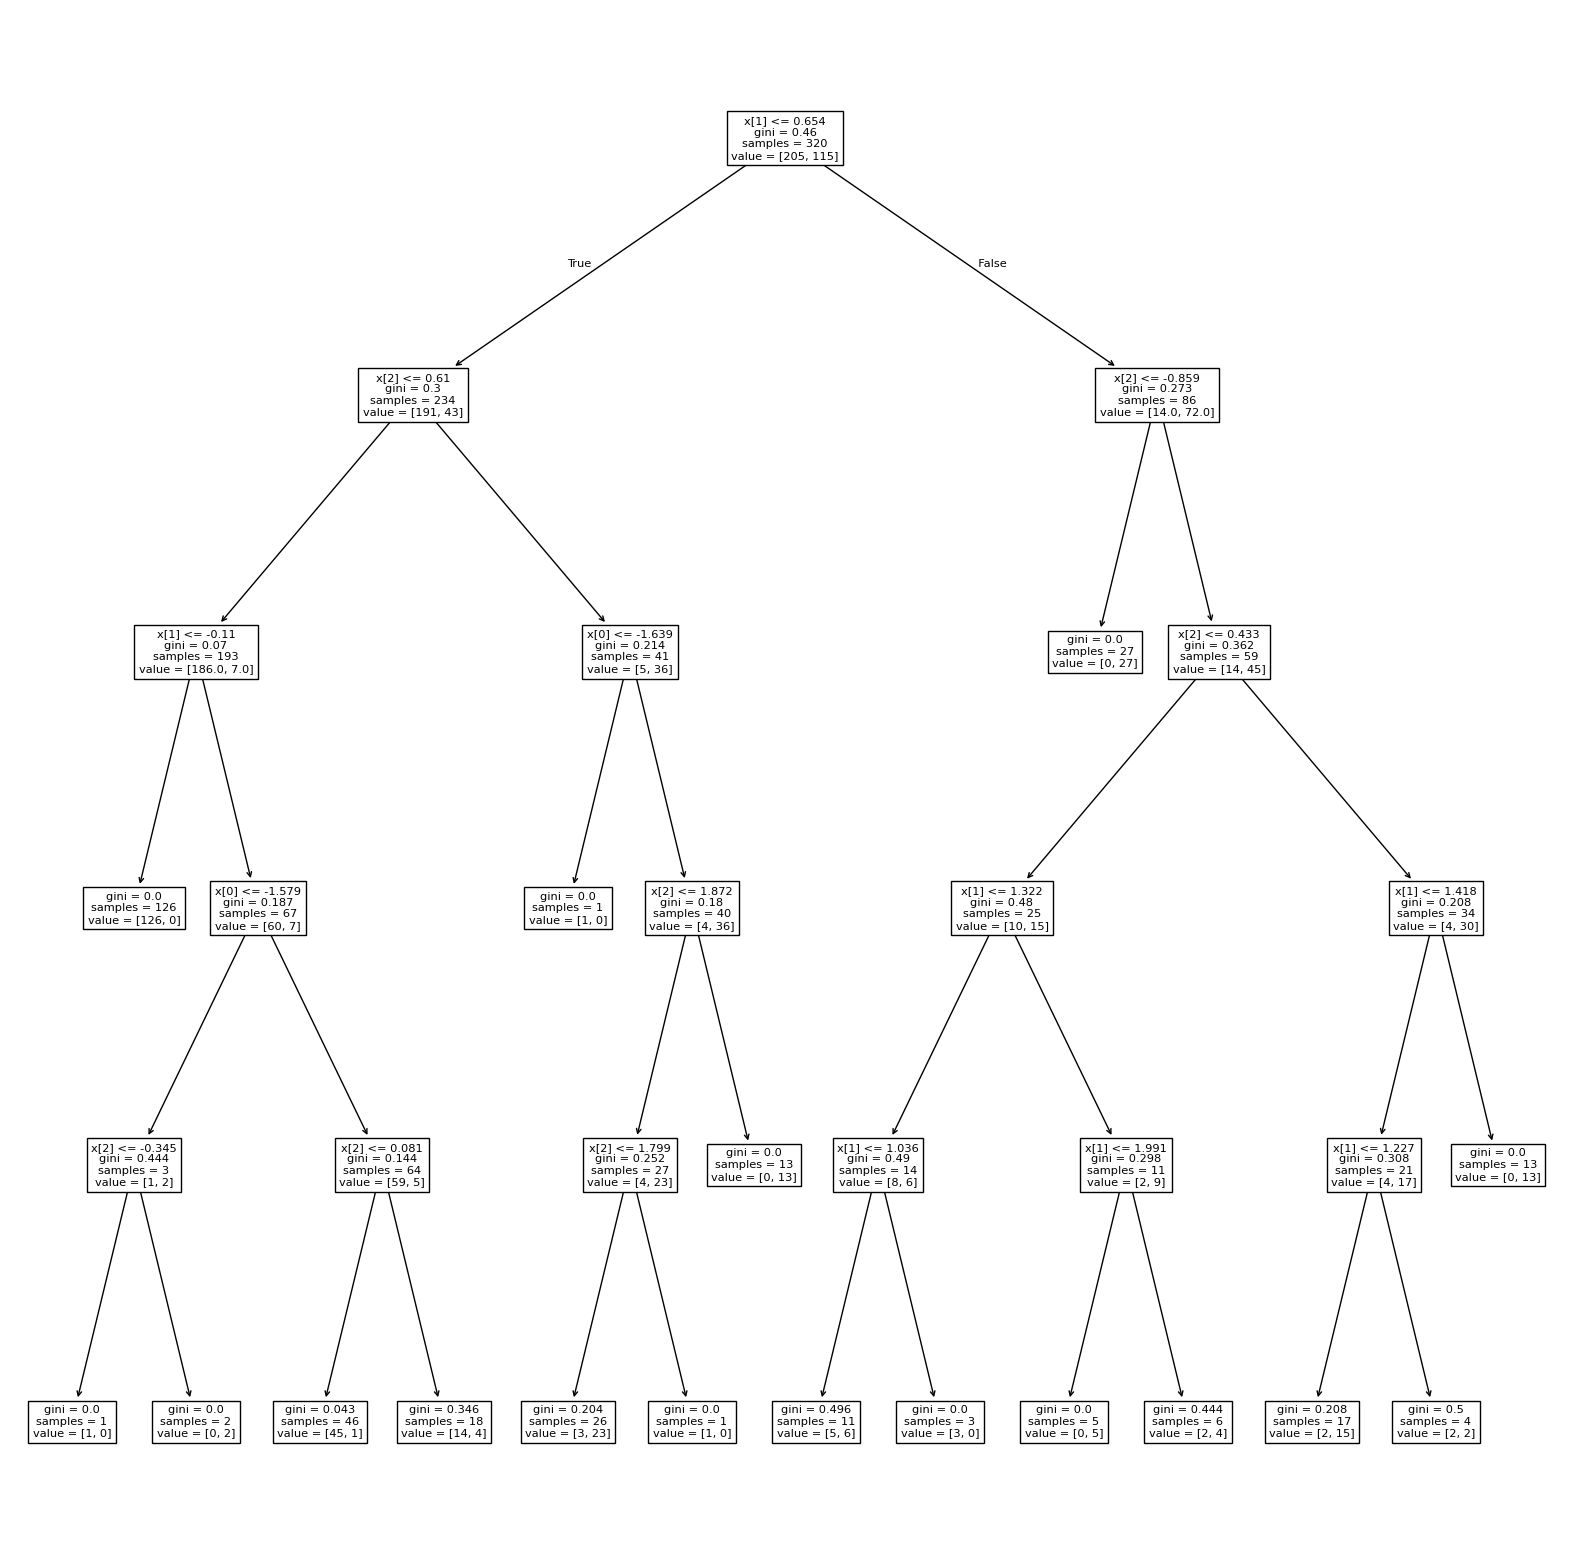

In [16]:
plt.figure(figsize=(20,20))
plt.savefig("demo.jpg")
plot_tree(dt)
plt.show()

In [22]:
# PRUNING OF DATASET IF DATA IS OVERFITTED

# pre-pruning

dt = DecisionTreeClassifier(max_depth=3)   # we fix the max-depth of the tree
#dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
dt.score(x_test,y_test)*100

91.25

In [24]:
dt.score(x_train,y_train)*100

92.1875

In [25]:
# post pruning

In [26]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)

0.821875 0.9 1
0.91875 0.9125 2
0.921875 0.9125 3
0.93125 0.9 4
0.940625 0.8875 5
0.959375 0.8875 6
0.978125 0.875 7
0.984375 0.875 8
0.99375 0.8625 9
1.0 0.8625 10
1.0 0.875 11
1.0 0.8625 12
1.0 0.8625 13
1.0 0.8625 14
1.0 0.875 15
1.0 0.8625 16
1.0 0.875 17
1.0 0.8625 18
1.0 0.8625 19


In [ ]:
# We observe that the difference between training and testing accuracy is very small in the first and second data
# so we will change the max-depth of the model to 3.